# Breast Cancer

#### This project aims in differentiating if a tumor in a person's breast is malign or benign. 
#### Provided are the steps followed:
#### - Importing required libraries and dataset
#### - Initial Exploratory Analysis
#### - Dividing Dependent and Independent Variables
#### - Splitting the data set into training and test set
#### - Training the data set using different Classification models
#### - Confusion Matrix and Accuracy Analysis of each model
#### - Final suggestion on selection of a model

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Initital Exploratory Analysis

In [2]:
dataset = pd.read_csv('breast_cancer.csv')

In [131]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
dataset.sample(n=5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
108,1171795,1,3,1,2,2,2,5,3,2,2
328,814265,2,1,1,1,2,1,1,1,1,2
287,63375,9,1,2,6,4,10,7,7,2,4
494,1297522,2,1,1,1,2,1,1,1,1,2
98,1166654,10,3,5,1,10,5,3,10,2,4


This dataset provides details of different samples with respective sample code numbers and its characteristics.
"Class" column here specifies if the tumour present is malignant or benign(2=benign, 4=malignant).

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


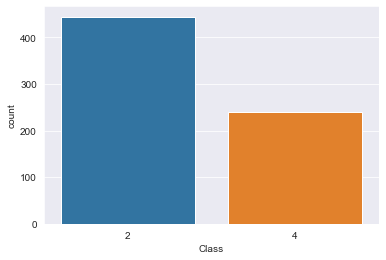

In [102]:
sns.countplot(x= "Class",data= dataset)
plt.show()

In [9]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

As there are no missing values, no imputation is required for this dataset

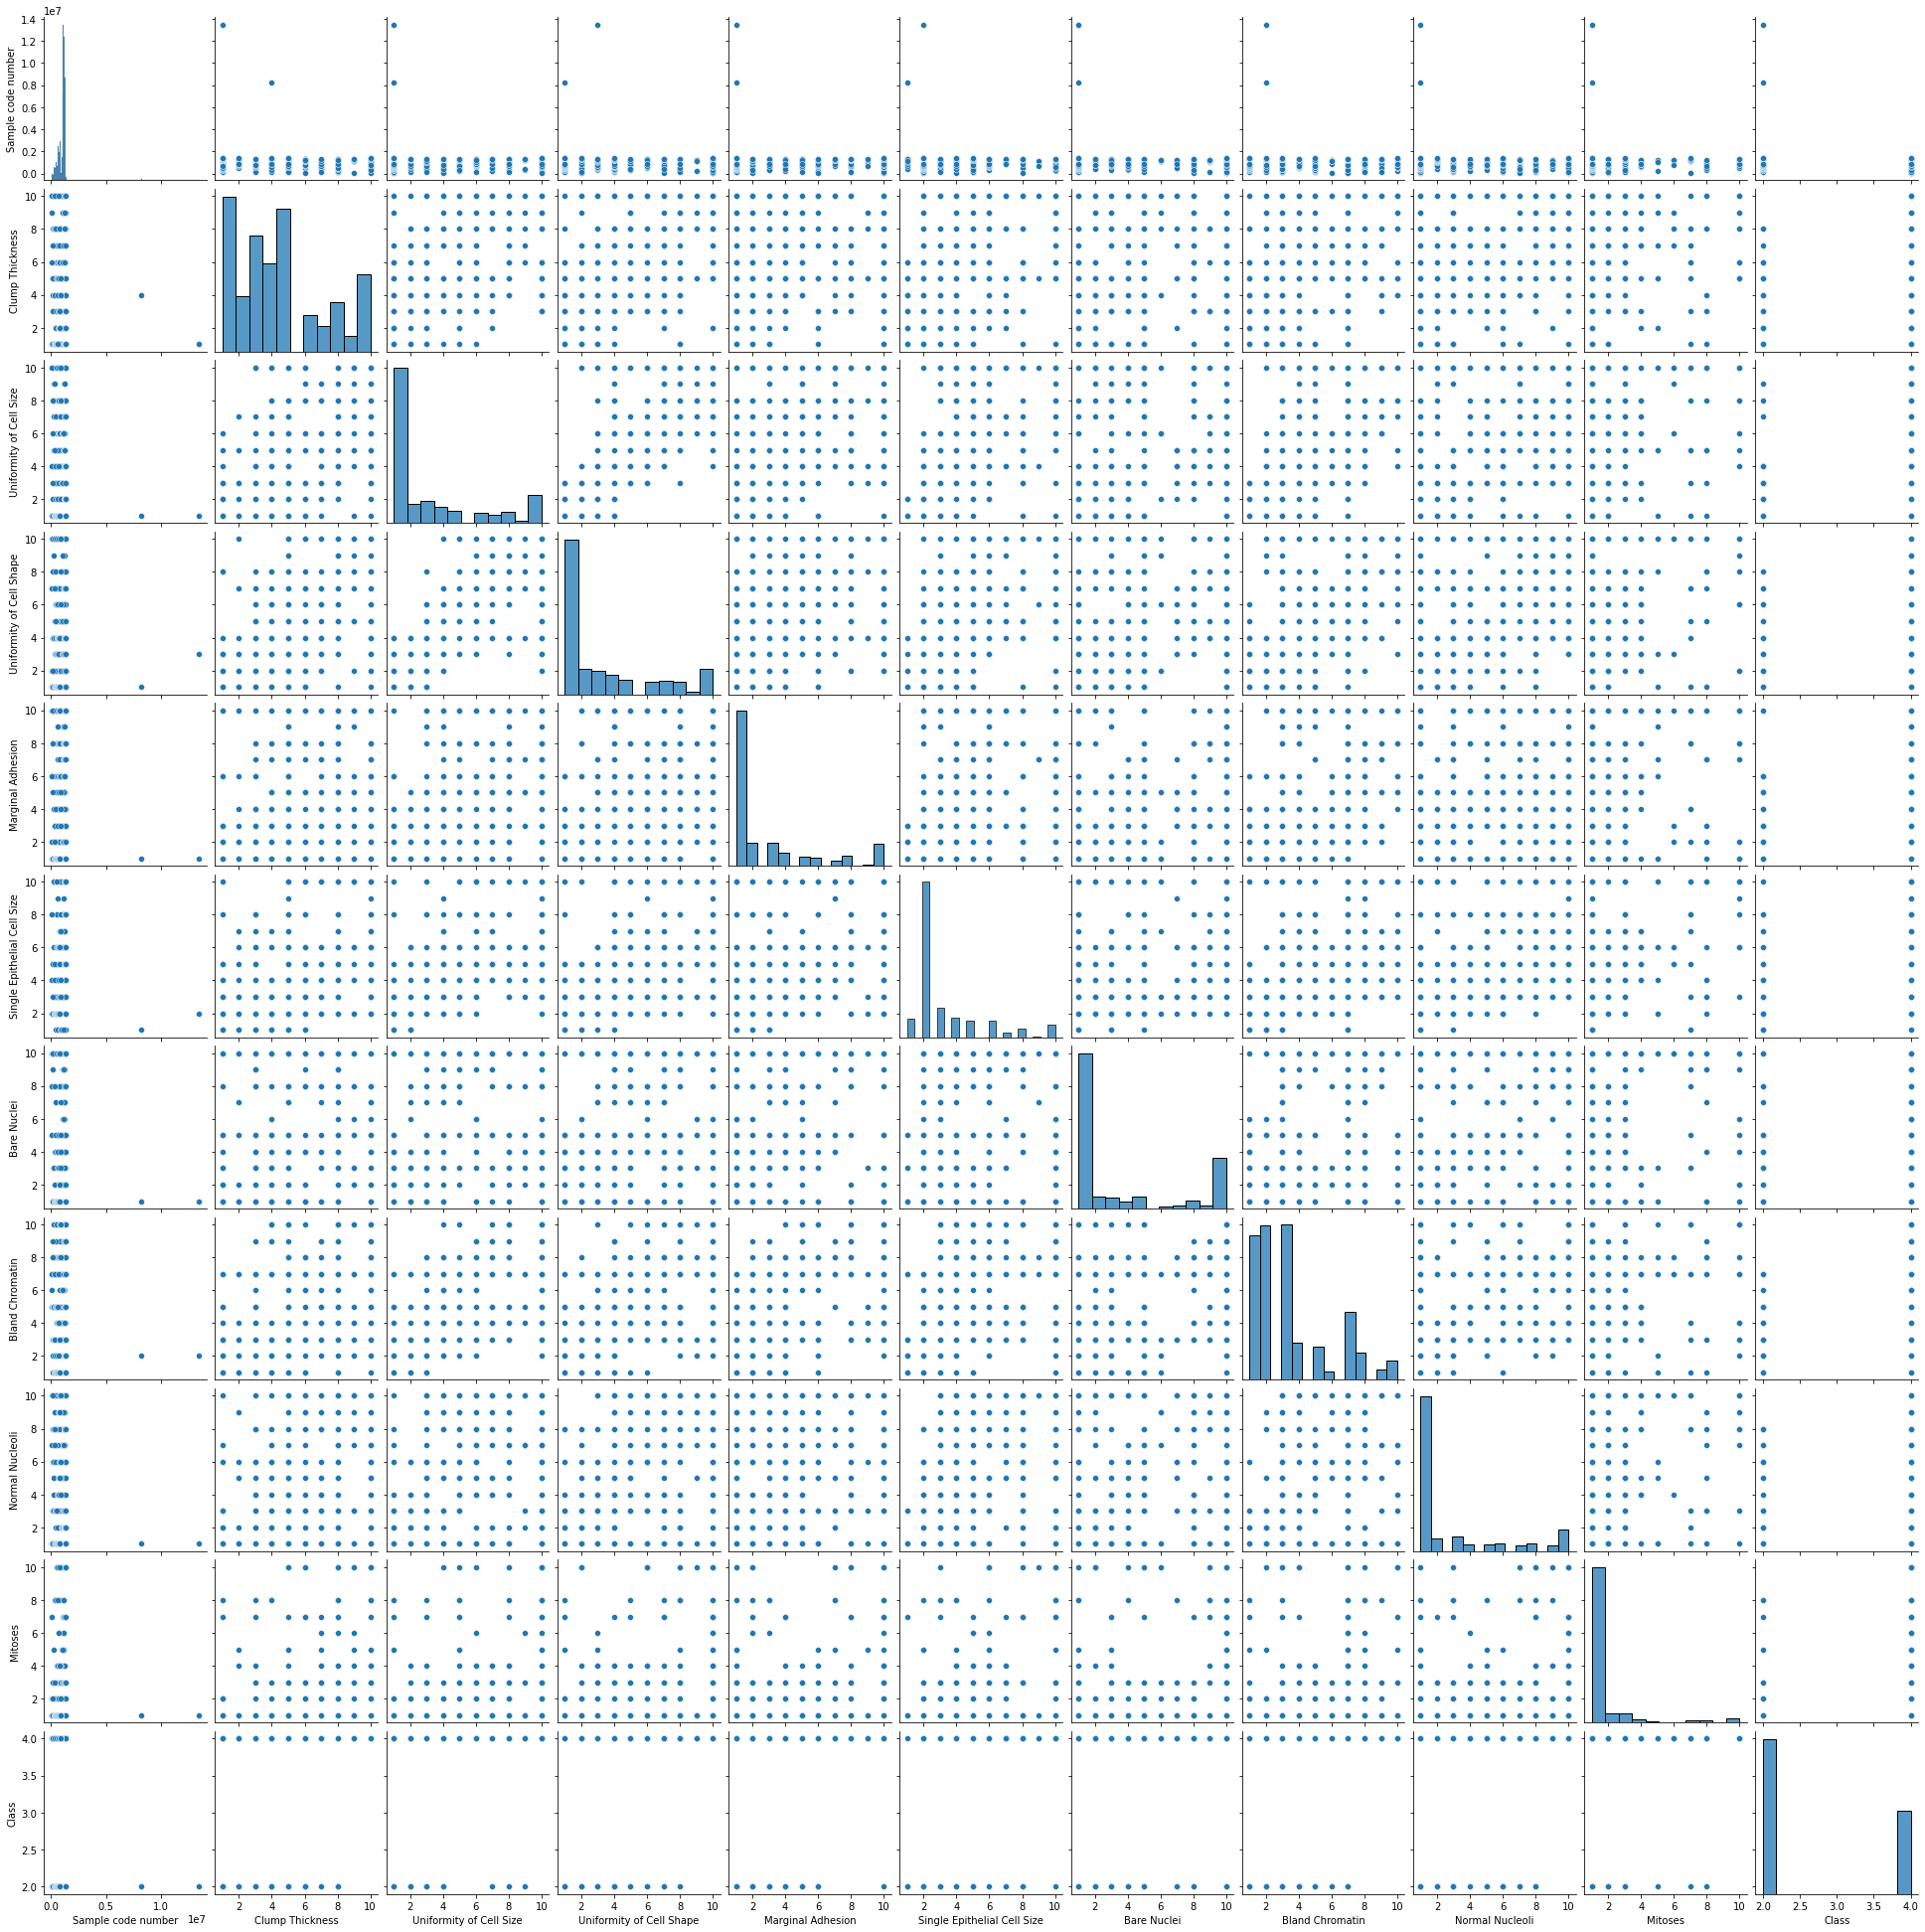

In [12]:
sns.pairplot(dataset)
plt.show()

It can be observed that, though integer values are provided all the parameters are ordinal in nature. 
 Clump Thickness: 1 - 10
 Uniformity of Cell Size: 1 - 10
 Uniformity of Cell Shape: 1 - 10
 Marginal Adhesion: 1 - 10
 Single Epithelial Cell Size: 1 - 10
 Bare Nuclei: 1 - 10
 Bland Chromatin: 1 - 10
 Normal Nucleoli: 1 - 10
 Mitoses: 1 - 10

<AxesSubplot:xlabel='Class', ylabel='Clump Thickness'>

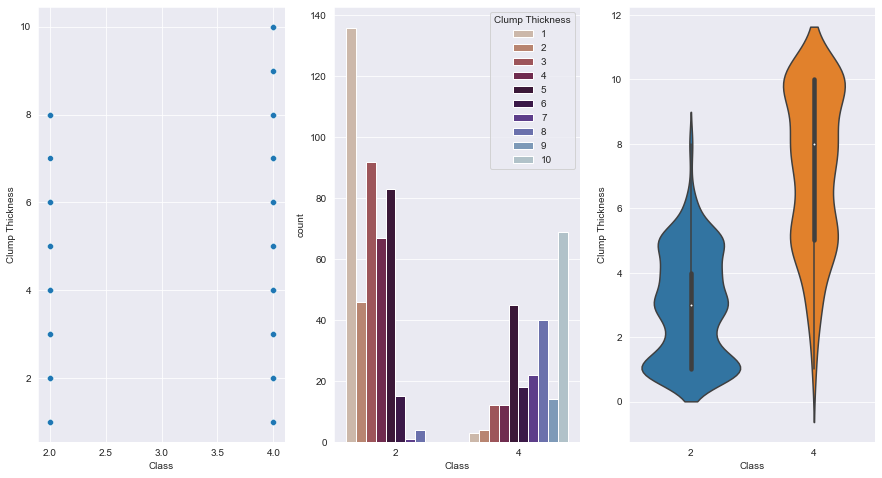

In [50]:
f,axes = plt.subplots(1,3,figsize=(15,8))
sns.set_style('darkgrid')

sns.scatterplot(data=dataset, x="Class", y="Clump Thickness",ax = axes[0])
sns.countplot(x='Class',hue = "Clump Thickness",data=dataset,palette='twilight_r',ax = axes[1])
sns.violinplot(data=dataset,x="Class",y = "Clump Thickness",ax = axes[2])


From the above subplots, we can state that
- there are higher possibilites of tumour being malignant if clump thickness is >7
- there are higher possibilites of tumour being malignant if clump thickness is <2

Similarly let us plot other features and try to get some insights from them

<AxesSubplot:xlabel='Class', ylabel='Mitoses'>

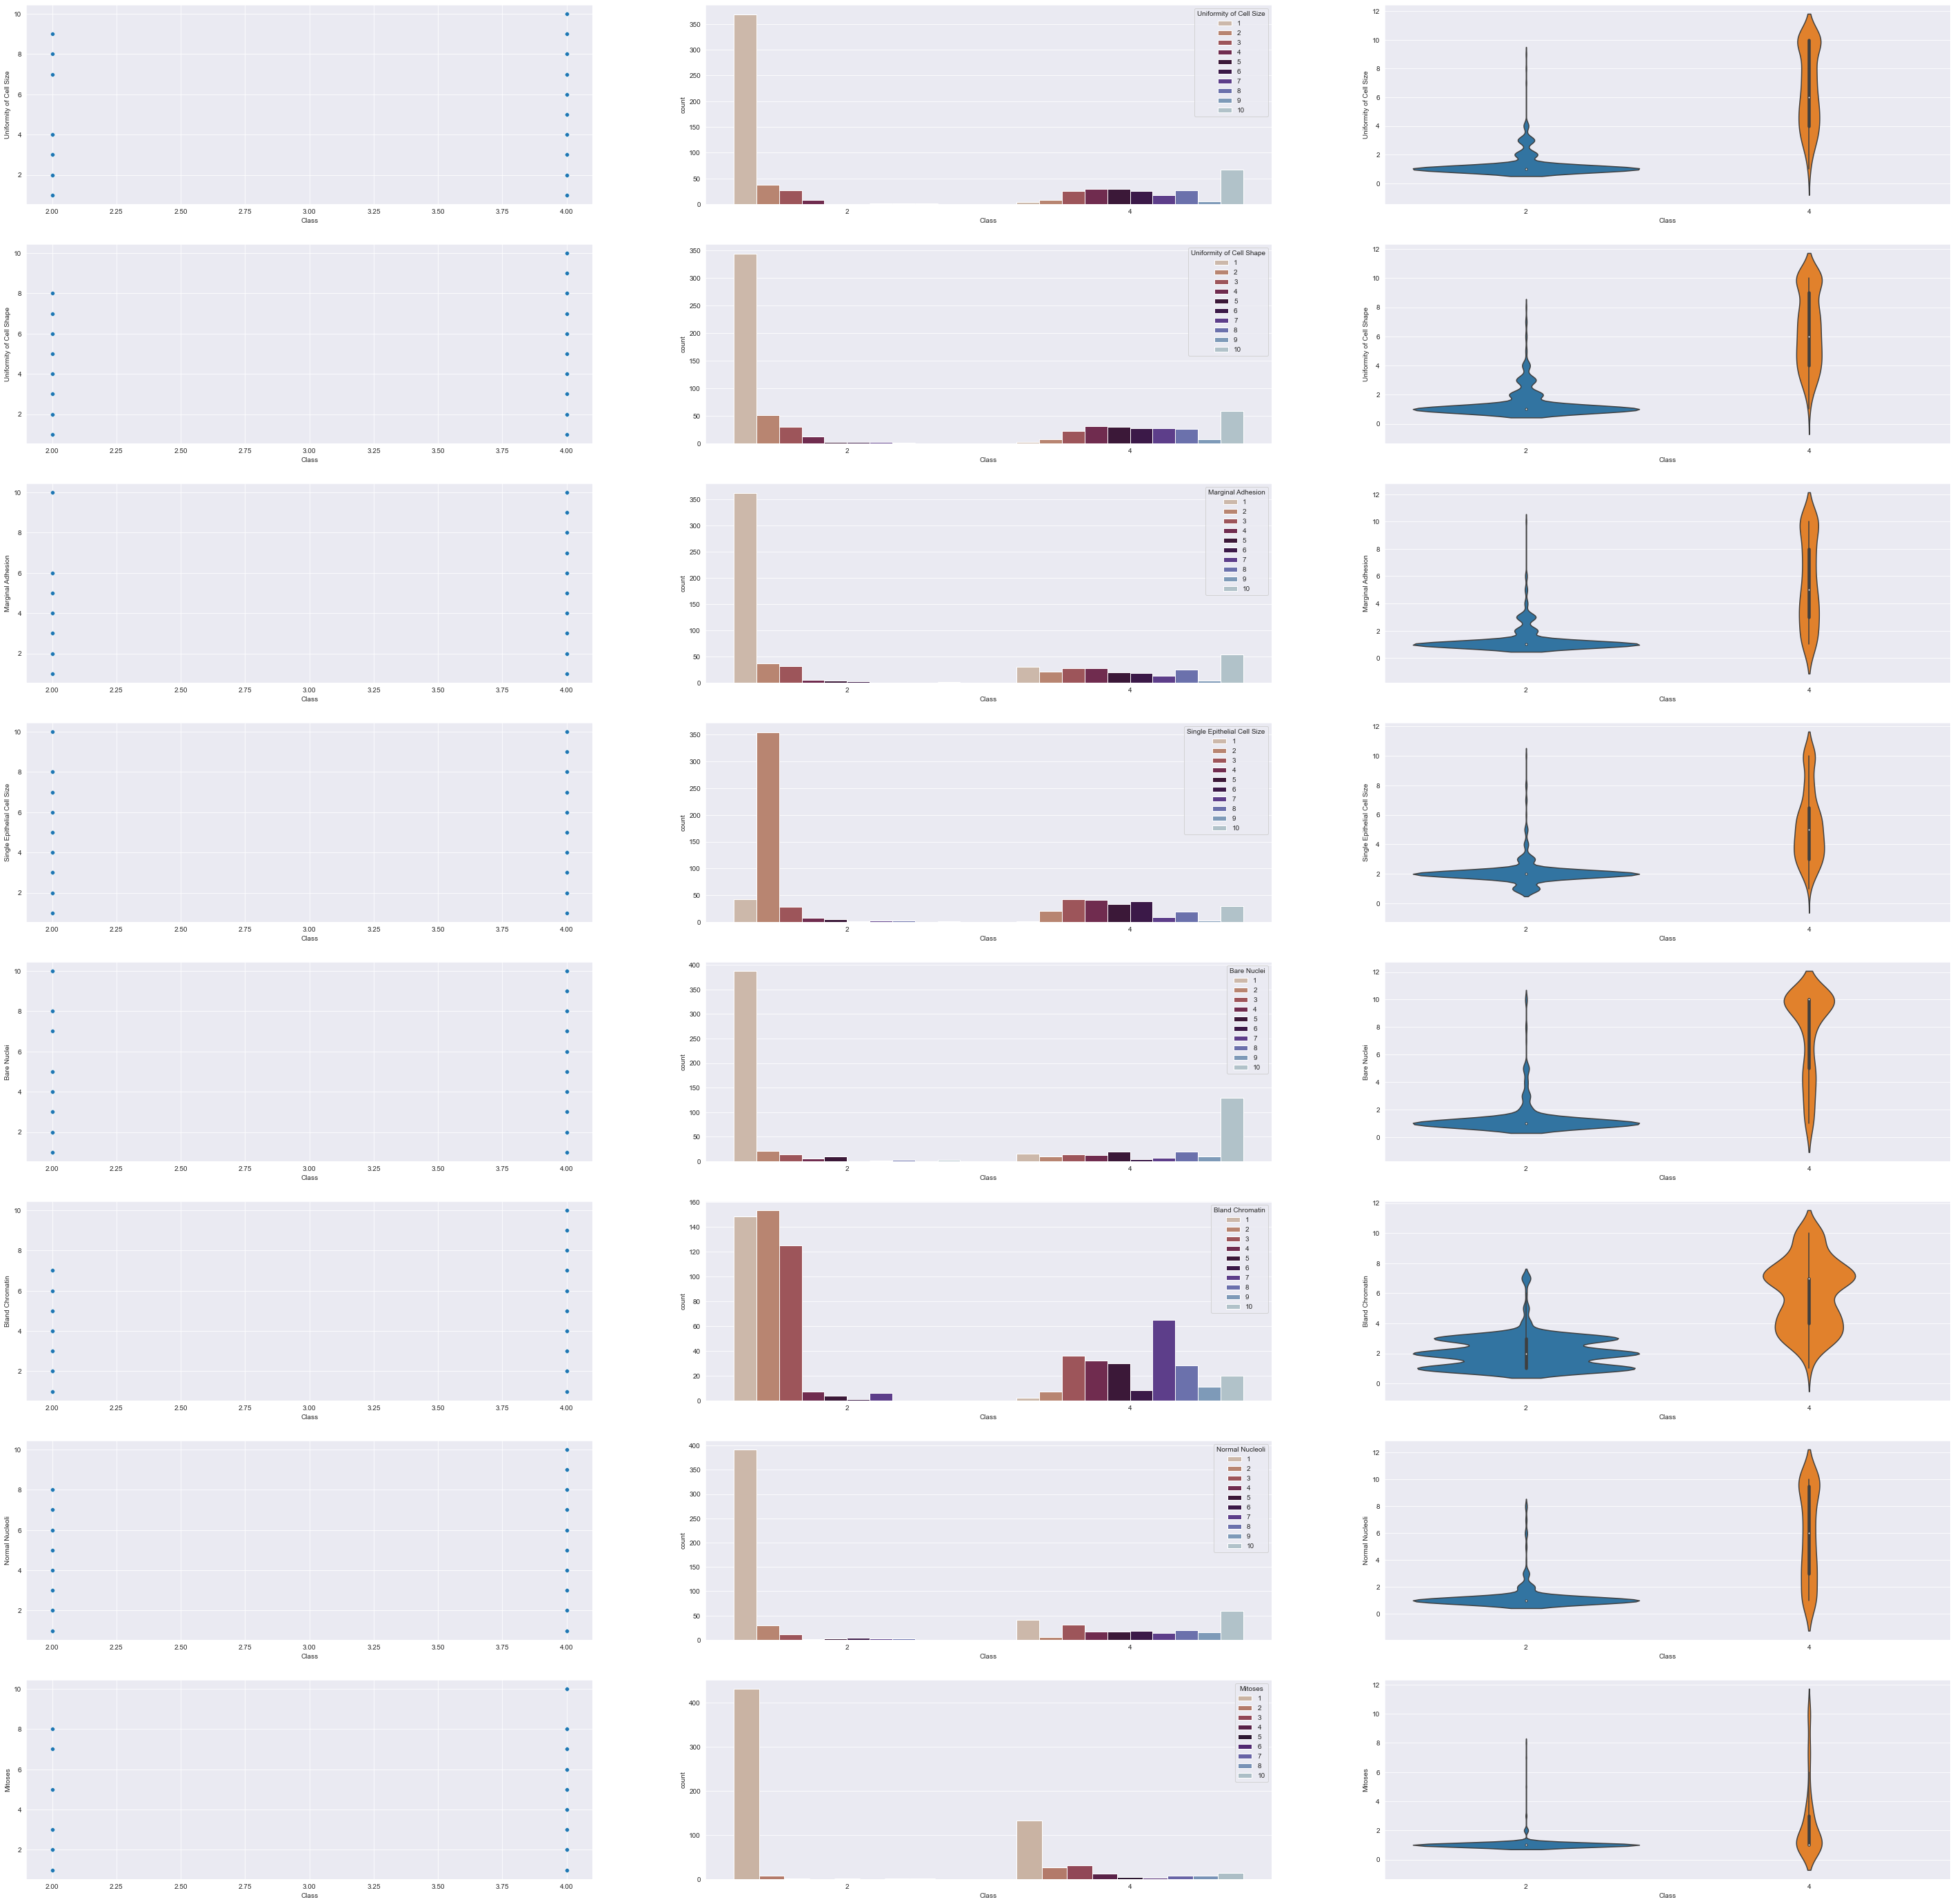

In [59]:
f,axes = plt.subplots(8,3,figsize=(50,50))
sns.set_style('darkgrid')

#Uniformity of Cell Size
sns.scatterplot(data=dataset, x="Class", y="Uniformity of Cell Size",ax = axes[0][0])
sns.countplot(x='Class',hue = "Uniformity of Cell Size",data=dataset,palette='twilight_r',ax = axes[0][1])
sns.violinplot(data=dataset,x="Class",y = "Uniformity of Cell Size",ax = axes[0][2])
#Uniformity of Cell Shape
sns.scatterplot(data=dataset, x="Class", y="Uniformity of Cell Shape",ax = axes[1][0])
sns.countplot(x='Class',hue = "Uniformity of Cell Shape",data=dataset,palette='twilight_r',ax = axes[1][1])
sns.violinplot(data=dataset,x="Class",y = "Uniformity of Cell Shape",ax = axes[1][2])
#Marginal Adhesion
sns.scatterplot(data=dataset, x="Class", y="Marginal Adhesion",ax = axes[2][0])
sns.countplot(x='Class',hue = "Marginal Adhesion",data=dataset,palette='twilight_r',ax = axes[2][1])
sns.violinplot(data=dataset,x="Class",y = "Marginal Adhesion",ax = axes[2][2])
#Single Epithelial Cell Size
sns.scatterplot(data=dataset, x="Class", y="Single Epithelial Cell Size",ax = axes[3][0])
sns.countplot(x='Class',hue = "Single Epithelial Cell Size",data=dataset,palette='twilight_r',ax = axes[3][1])
sns.violinplot(data=dataset,x="Class",y = "Single Epithelial Cell Size",ax = axes[3][2])
#Bare Nuclei
sns.scatterplot(data=dataset, x="Class", y="Bare Nuclei",ax = axes[4][0])
sns.countplot(x='Class',hue = "Bare Nuclei",data=dataset,palette='twilight_r',ax = axes[4][1])
sns.violinplot(data=dataset,x="Class",y = "Bare Nuclei",ax = axes[4][2])
#Bland Chromatin
sns.scatterplot(data=dataset, x="Class", y="Bland Chromatin",ax = axes[5][0])
sns.countplot(x='Class',hue = "Bland Chromatin",data=dataset,palette='twilight_r',ax = axes[5][1])
sns.violinplot(data=dataset,x="Class",y = "Bland Chromatin",ax = axes[5][2])
#Normal Nucleoli
sns.scatterplot(data=dataset, x="Class", y="Normal Nucleoli",ax = axes[6][0])
sns.countplot(x='Class',hue = "Normal Nucleoli",data=dataset,palette='twilight_r',ax = axes[6][1])
sns.violinplot(data=dataset,x="Class",y = "Normal Nucleoli",ax = axes[6][2])
# Mitoses
sns.scatterplot(data=dataset, x="Class", y="Mitoses",ax = axes[7][0])
sns.countplot(x='Class',hue = "Mitoses",data=dataset,palette='twilight_r',ax = axes[7][1])
sns.violinplot(data=dataset,x="Class",y = "Mitoses",ax = axes[7][2])


From the above plots, we can clear state that 
- with increase in value of features provided, there is a higher probability of the tumour being malign
- but we cannot exactly state if a tumour is exactly malign or benign as there are some cases which are being beningn for lower
  values as well
  
Let us see the effect of each characteristic of tumour with a correlated heatmap  

<AxesSubplot:>

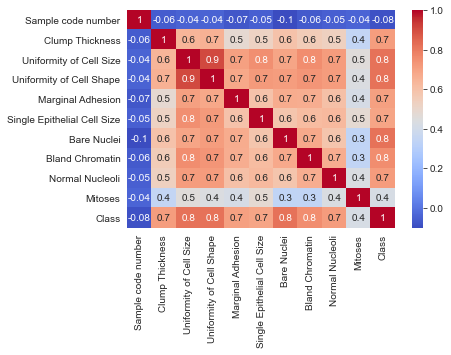

In [18]:
sns.heatmap(dataset.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')

From the above heatmap, we can state that:
- Mitosis have less role to play when compared with other features
- Features like Uniformity of Cell size and shape, Bare Nuclei ,and Bland Chromatin have a greater effect on tumour character 

## Dividing Dependent and Independent Variables

Let us build classification models so that we can tell if the tumour is benign or malign with greater accuracies.
For that we need to define all independent and dependent variables. We know that "Class" is dependent and all others are 
independent variables.

Therefore, dividing variables to X = Independent Variables and y = Dependent Variable

In [61]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

As all the features have same range (i.e from 0 to 10), there is no need for feature scaling of the independent variables.

## Training the data set using different Classification models

In [63]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)
classifier_lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [64]:
#K-nn
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
#Support Vector Machine
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [66]:
#Kernel SVM
from sklearn.svm import SVC
classifier_kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_kernel.fit(X_train, y_train)

SVC(random_state=0)

In [67]:
#Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [68]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [70]:
y_pred_lg = classifier_lg.predict(X_test)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_svm = classifier_svm.predict(X_test)
y_pred_kernel = classifier_kernel.predict(X_test)
y_pred_nb = classifier_nb.predict(X_test)
y_pred_dt = classifier_dt.predict(X_test)
y_pred_rf = classifier_rf.predict(X_test)

## Making the Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lg = confusion_matrix(y_test, y_pred_lg)
print("Linear Regression:")
print(cm_lg)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("K Nearest Neighbours:")
print(cm_knn)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Support Vector Machine:")
print(cm_svm)

cm_kernel = confusion_matrix(y_test, y_pred_kernel)
print("Kernel SVM:")
print(cm_kernel)

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes:")
print(cm_nb)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree:")
print(cm_dt)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest:")
print(cm_rf)

Linear Regression:
[[84  3]
 [ 3 47]]
K Nearest Neighbours:
[[84  3]
 [ 1 49]]
Support Vector Machine:
[[83  4]
 [ 2 48]]
Kernel SVM:
[[83  4]
 [ 1 49]]
Naive Bayes:
[[80  7]
 [ 0 50]]
Decision Tree:
[[84  3]
 [ 3 47]]
Random Forest:
[[83  4]
 [ 3 47]]


Here in K Nearest Neighbours: 
- 84 tumours are truely predicted as benign
- 49 tumours are truely predicted as malign
- 3 tumours are falsely predicted as benign(false -ve)
- 1 tumour is falsely predicted as malign(false +ve)

In this case, it is really important to minimse false -ve as the patient might miss the treatment required.
Hence we can choose a model with less false -ves and more accuracy.

## Computing the accuracy with k-Fold Cross Validation

LogisticRegression : Accuracy 96.7 ,Std Dev: 1.97
Knn : Accuracy 97.44 ,Std Dev: 1.85
SVM : Accuracy 97.07 ,Std Dev: 2.19
Kernel-SVM : Accuracy 96.89 ,Std Dev: 2.17
NaiveBaiyes : Accuracy 96.52 ,Std Dev: 2.24
DecisionTree : Accuracy 94.33 ,Std Dev: 2.65
RandomForest : Accuracy 96.33 ,Std Dev: 2.01


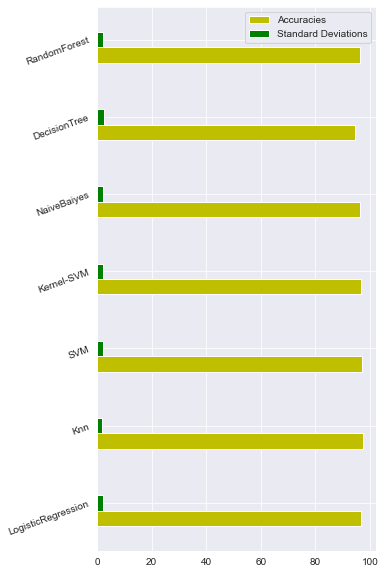

In [130]:
from sklearn.model_selection import cross_val_score
accuracies_lg = cross_val_score(estimator = classifier_lg, X = X_train, y = y_train, cv = 10)
accuracies_knn = cross_val_score(estimator = classifier_knn, X = X_train, y = y_train, cv = 10)
accuracies_svm = cross_val_score(estimator = classifier_svm, X = X_train, y = y_train, cv = 10)
accuracies_kernel = cross_val_score(estimator = classifier_kernel, X = X_train, y = y_train, cv = 10)
accuracies_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 10)
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)

accuracy_means=[]
accuracy_stds=[]

model_names = ["LogisticRegression","Knn","SVM","Kernel-SVM","NaiveBaiyes","DecisionTree","RandomForest"]
models=[accuracies_lg,accuracies_knn,accuracies_svm,accuracies_kernel,accuracies_nb,accuracies_dt,accuracies_rf]
for i in models:
    accuracy_means.append(round(i.mean()*100,2))
    accuracy_stds.append(round(i.std()*100,2))

for i in range(7):
    print(model_names[i],": Accuracy",accuracy_means[i],",Std Dev:",accuracy_stds[i])

    
#plotting
plt.figure(figsize=(5,10))
models_index=np.arange(len(models))
width=0.2

plt.barh(models_index,accuracy_means,width,color="y",label="Accuracies")
plt.barh(models_index+width,accuracy_stds,width,color="g",label="Standard Deviations")
plt.legend()

plt.yticks(models_index+width,model_names,rotation=20)
plt.show()

#plt.bar(models,(accuracy_means*100))
#plt.bar(models,(accuracy_stds()*100))

#print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
#print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### Final suggestion on selection of a model
From the figure is it evident that accuracies and standard deviations are almost equal with Knn having highest accuracy and lowest standard deviation.

Even it has less no of false positives, hence we can choose K- nearest neighbours algorithm henceforth in determining our future values.